Duplicates before cleaning: 0
Duplicates after cleaning: 0
Missing values before cleaning: 0
Missing values after cleaning: 0
Unique gender values before standardization: ['Male' 'Female']
Unique gender values after standardization: ['Male' 'Female']


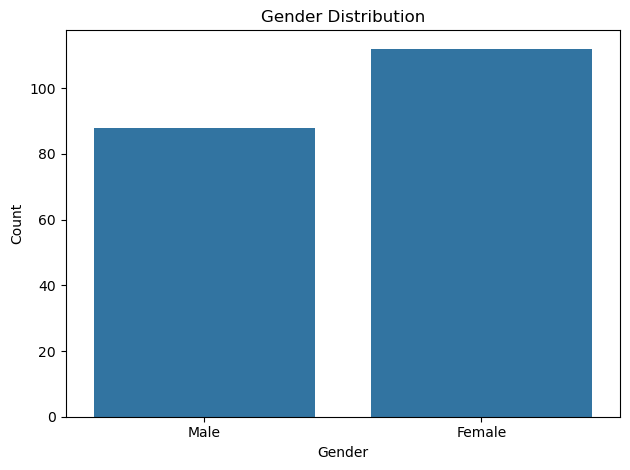

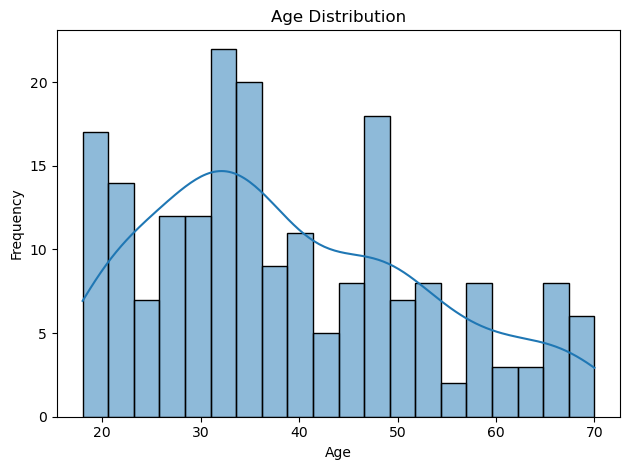

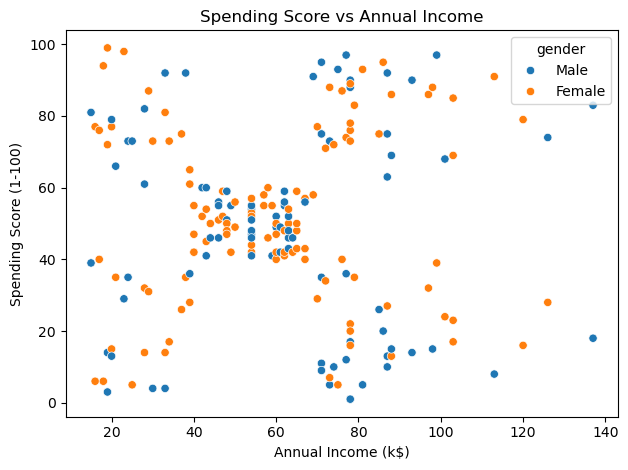

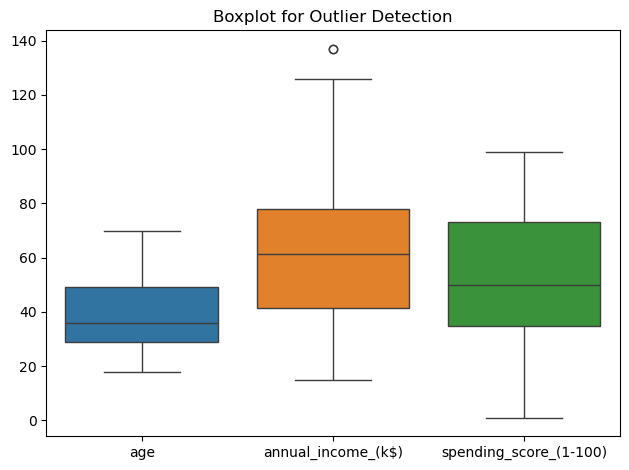

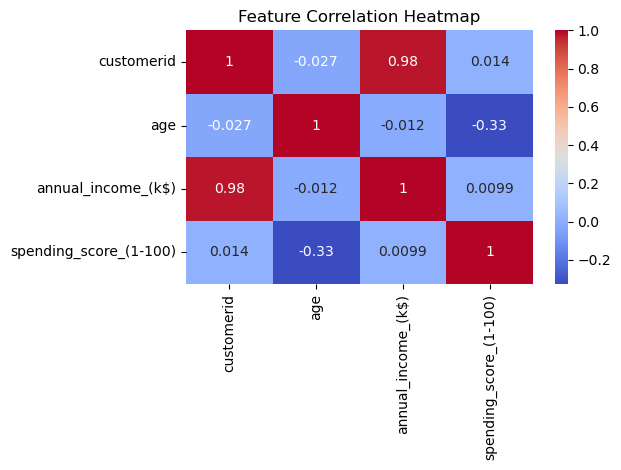


Correlation Matrix:
                        customerid       age  annual_income_(k$)  \
customerid                1.000000 -0.026763            0.977548   
age                      -0.026763  1.000000           -0.012398   
annual_income_(k$)        0.977548 -0.012398            1.000000   
spending_score_(1-100)    0.013835 -0.327227            0.009903   

                        spending_score_(1-100)  
customerid                            0.013835  
age                                  -0.327227  
annual_income_(k$)                    0.009903  
spending_score_(1-100)                1.000000  


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Rename columns (uniform format)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Drop duplicates
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
duplicates_after = df.duplicated().sum()

# Handle missing values
missing_before = df.isnull().sum().sum()
if missing_before > 0:
    df = df.fillna(method='ffill')
missing_after = df.isnull().sum().sum()

# Standardize text in 'gender'
gender_before = df['gender'].unique()
df['gender'] = df['gender'].str.strip().str.capitalize()
gender_after = df['gender'].unique()

# Convert data types
df['age'] = df['age'].astype(int)
df['annual_income_(k$)'] = df['annual_income_(k$)'].astype(int)
df['spending_score_(1-100)'] = df['spending_score_(1-100)'].astype(int)

# Save cleaned data
df.to_csv('Mall_Customers_Cleaned.csv', index=False)

# =======================
# Text Summary of Changes
# =======================

# 1. Duplicates
print(f"Duplicates before cleaning: {duplicates_before}")
print(f"Duplicates after cleaning: {duplicates_after}")

# 2. Missing Values
print(f"Missing values before cleaning: {missing_before}")
print(f"Missing values after cleaning: {missing_after}")

# 3. Gender Standardization
print(f"Unique gender values before standardization: {gender_before}")
print(f"Unique gender values after standardization: {gender_after}")

# =======================
# 📊 Visualization Section
# =======================

# Gender Distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Age Distribution
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Spending Score vs Income
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='gender', data=df)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
sns.boxplot(data=df[['age', 'annual_income_(k$)', 'spending_score_(1-100)']])
plt.title('Boxplot for Outlier Detection')
plt.tight_layout()
plt.show()

# Only select numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Correlation Heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Correlation Summary (Text Output)
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


